# Anomaly Detection (Outlier Detection)

This notebook contains 3 effective outlier detection techniques explained and applied to a UCI Machine Learning Repository's [Wholesale Customers dataset](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)

### [Sklearn's Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) 

Returns the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [13]:
import pandas as pd
df = pd.read_csv('Wholesale Customers data.csv')

In [14]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


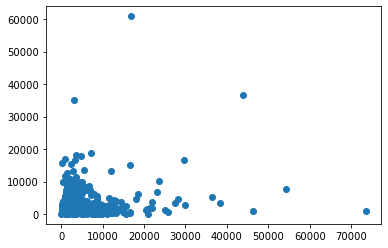

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,3], df.iloc[:,5])

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
clf = IsolationForest(contamination = 0.2)
clf.fit(df)
predictions = clf.predict(df)

In [22]:
predictions

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1

The predictions marked as '-1' are outliers.

In [25]:
import numpy as np
index = np.where(predictions < 0)
index

(array([  2,   4,  12,  22,  23,  24,  28,  39,  40,  45,  47,  49,  52,
         56,  61,  65,  71,  73,  77,  85,  86,  87,  92,  93, 103, 109,
        125, 145, 163, 165, 171, 181, 183, 196, 200, 201, 202, 205, 207,
        209, 211, 215, 216, 218, 221, 223, 226, 228, 230, 239, 240, 244,
        245, 251, 253, 254, 258, 259, 264, 265, 266, 267, 268, 284, 301,
        303, 304, 305, 306, 309, 312, 315, 319, 325, 331, 333, 334, 335,
        338, 343, 351, 358, 370, 384, 413, 427, 435, 437], dtype=int64),)

In [26]:
x = df.values

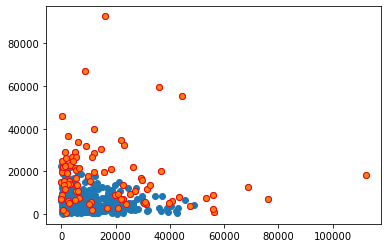

In [27]:
plt.scatter(df.iloc[:,2], df.iloc[:,4])
plt.scatter(x[index,2], x[index,4], edgecolors = "r")

### [DBSCAN Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

In [1]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = make_circles(n_samples = 750, factor = 0.3, noise = 0.1)

In [4]:
X

array([[ 0.09199816, -0.97400445],
       [ 0.634644  , -1.095025  ],
       [ 0.06975147,  0.43724804],
       ...,
       [-0.94654972, -0.47773464],
       [-0.3187995 , -1.00824396],
       [ 0.04932053,  0.31001236]])

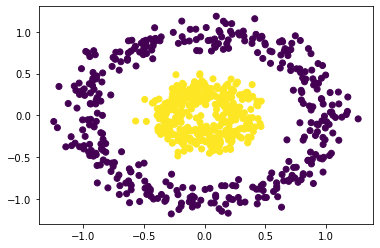

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN(eps = 0.1)

In [8]:
dbscan.fit_predict(X)

array([ 3, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1, 11,  4,  0,  0,  2,
        3,  0,  0,  1,  0,  0,  4, -1,  5,  0,  5,  0,  1,  3,  6,  7,  2,
        6,  8,  9,  0,  0,  0,  0,  0, 10,  0, 11,  8, -1, 10, -1,  0,  0,
        4,  0,  0,  0,  0,  1,  5, -1,  0,  7,  2,  0,  0,  0, -1,  4,  8,
        2, 12,  5,  1,  0,  0, 11,  2,  0, 10, -1,  1,  0,  2, 10,  3,  4,
        3, -1,  0,  0, 15, 12,  0,  0,  0,  6,  2,  9,  6,  5,  0,  2,  0,
        9,  2, -1,  3,  3,  0,  0,  9, 14,  0,  5,  0,  8,  1,  0,  0,  5,
        0,  0,  5,  8,  0,  0,  0,  0,  0, 13,  0,  0,  0, -1,  1,  3,  2,
        0,  4,  0, 14,  3,  0,  8,  6,  0,  6, -1,  0, -1,  0,  6, 12,  8,
        0, 13,  0,  9,  5,  2,  2,  0,  0,  0, 11, -1,  0,  0,  8,  0,  0,
        6,  0,  0,  0,  0,  0, -1,  0,  0, 14,  1,  0, 10,  0,  0,  0,  0,
        0, 10,  0, -1,  2,  0, 11, 11,  0, 11, 15,  0,  0, 11, -1, 10,  0,
        5,  0,  0,  0, 11, 14,  0,  5,  0, -1, -1,  2,  8,  0, 11, -1,  8,
        0,  2, -1,  0, 11

In [9]:
dbscan.labels_

array([ 3, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1, 11,  4,  0,  0,  2,
        3,  0,  0,  1,  0,  0,  4, -1,  5,  0,  5,  0,  1,  3,  6,  7,  2,
        6,  8,  9,  0,  0,  0,  0,  0, 10,  0, 11,  8, -1, 10, -1,  0,  0,
        4,  0,  0,  0,  0,  1,  5, -1,  0,  7,  2,  0,  0,  0, -1,  4,  8,
        2, 12,  5,  1,  0,  0, 11,  2,  0, 10, -1,  1,  0,  2, 10,  3,  4,
        3, -1,  0,  0, 15, 12,  0,  0,  0,  6,  2,  9,  6,  5,  0,  2,  0,
        9,  2, -1,  3,  3,  0,  0,  9, 14,  0,  5,  0,  8,  1,  0,  0,  5,
        0,  0,  5,  8,  0,  0,  0,  0,  0, 13,  0,  0,  0, -1,  1,  3,  2,
        0,  4,  0, 14,  3,  0,  8,  6,  0,  6, -1,  0, -1,  0,  6, 12,  8,
        0, 13,  0,  9,  5,  2,  2,  0,  0,  0, 11, -1,  0,  0,  8,  0,  0,
        6,  0,  0,  0,  0,  0, -1,  0,  0, 14,  1,  0, 10,  0,  0,  0,  0,
        0, 10,  0, -1,  2,  0, 11, 11,  0, 11, 15,  0,  0, 11, -1, 10,  0,
        5,  0,  0,  0, 11, 14,  0,  5,  0, -1, -1,  2,  8,  0, 11, -1,  8,
        0,  2, -1,  0, 11

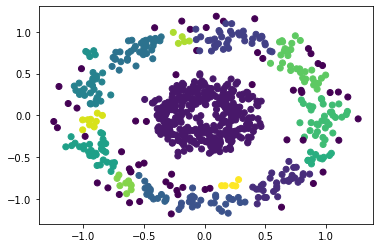

In [10]:
plt.scatter(X[:,0],X[:,1], c= dbscan.labels_)

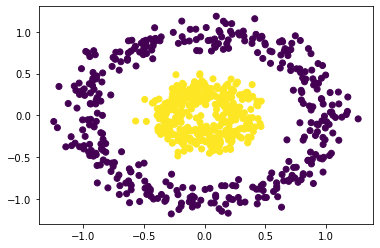

In [12]:
plt.scatter(X[:,0],X[:,1], c = y)


### [Local Outlier Factor Anomaly Detection](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

Unsupervised Outlier Detection using the Local Outlier Factor (LOF).

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [28]:
from sklearn.neighbors import LocalOutlierFactor

In [30]:
local = LocalOutlierFactor(n_neighbors = 3)

In [42]:
predictions = local.fit_predict(df)

In [43]:
predictions

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [44]:
index = np.where(predictions < 0)
index

(array([  2,  23,  38,  47,  61,  71,  72,  87,  93, 103, 109, 125, 145,
        181, 183, 184, 185, 196, 202, 218, 228, 230, 248, 254, 257, 309,
        312, 319, 325, 333, 338, 358, 363, 372, 403, 404, 409, 411, 427,
        429, 430, 435], dtype=int64),)

In [48]:
x = df.values

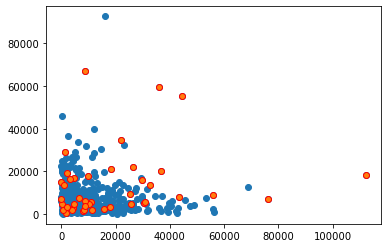

In [49]:
plt.scatter(df.iloc[:,2], df.iloc[:,4])
# plt.scatter(x[index,2], x[index, 4])
plt.scatter(x[index,2], x[index,4], edgecolors = "r")